In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import requests
import time
import gmaps
from scipy.stats import linregress

# Import API key
from api_keys import gkey

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# Census data files
census_state_path_2015 = "Output/2015_cleaned_all_county.csv"
census_state_code_data = "Output/county_code_data.csv"

In [3]:
# Read the Census data
census_state_results_2015 = pd.read_csv(census_state_path_2015)
census_state_code = pd.read_csv(census_state_code_data)


In [4]:
census_state_results_2015.head()

,Unnamed: 0,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,OtherTrans,WorkatHome,MeanCommute,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Poverty,ChildPoverty,Unemployment
0,0,Alabama,Autauga,55221,26745,28476,1435,41857,10215,220,...,311,431,26,17653,5013,1319,0,7123,10271,4196
1,1,Alabama,Baldwin,195121,95314,99807,8780,162145,18536,1170,...,1203,3352,26,70051,10572,4985,343,26146,37463,14634
2,2,Alabama,Barbour,26932,14497,12435,1238,12442,12577,53,...,128,137,24,6172,1788,627,8,7190,12200,4740
3,3,Alabama,Bibb,22604,12073,10531,497,16839,4837,90,...,124,58,28,6369,1335,555,33,3797,6306,1876
4,4,Alabama,Blount,57710,28512,29198,4963,50727,865,173,...,88,510,34,18194,2995,931,88,9637,15697,4443


In [5]:
census_state_code.head()

,State Code,State,County,Region,Division,lat,lng
0,AK,Alaska,Bethel,West,Pacific,60.7287,-161.7730
1,AK,Alaska,Prince of Wales-Hyder,West,Pacific,55.5573,-132.4137
2,AK,Alaska,Kusilvak,West,Pacific,62.0911,-163.7209
3,AK,Alaska,Yukon-Koyukuk,West,Pacific,65.1746,-152.0684
4,AK,Alaska,Kenai Peninsula,West,Pacific,60.4997,-149.4464


In [6]:
census_2015_state_data = pd.merge(census_state_results_2015, census_state_code, how="left", on=["State","County"])
census_2015_state_data.head()


,Unnamed: 0,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,SelfEmployed,FamilyWork,Poverty,ChildPoverty,Unemployment,State Code,Region,Division,lat,lng
0,0,Alabama,Autauga,55221,26745,28476,1435,41857,10215,220,...,1319,0,7123,10271,4196,AL,South,East South Central,32.6793,-86.4607
1,1,Alabama,Baldwin,195121,95314,99807,8780,162145,18536,1170,...,4985,343,26146,37463,14634,AL,South,East South Central,30.2758,-87.7014
2,2,Alabama,Barbour,26932,14497,12435,1238,12442,12577,53,...,627,8,7190,12200,4740,AL,South,East South Central,31.7810,-85.5583
3,3,Alabama,Bibb,22604,12073,10531,497,16839,4837,90,...,555,33,3797,6306,1876,AL,South,East South Central,32.9597,-87.1334
4,4,Alabama,Blount,57710,28512,29198,4963,50727,865,173,...,931,88,9637,15697,4443,AL,South,East South Central,33.8789,-86.8241


In [7]:
census_2015 = pd.DataFrame(census_2015_state_data)
census_2015.head()

,Unnamed: 0,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,SelfEmployed,FamilyWork,Poverty,ChildPoverty,Unemployment,State Code,Region,Division,lat,lng
0,0,Alabama,Autauga,55221,26745,28476,1435,41857,10215,220,...,1319,0,7123,10271,4196,AL,South,East South Central,32.6793,-86.4607
1,1,Alabama,Baldwin,195121,95314,99807,8780,162145,18536,1170,...,4985,343,26146,37463,14634,AL,South,East South Central,30.2758,-87.7014
2,2,Alabama,Barbour,26932,14497,12435,1238,12442,12577,53,...,627,8,7190,12200,4740,AL,South,East South Central,31.7810,-85.5583
3,3,Alabama,Bibb,22604,12073,10531,497,16839,4837,90,...,555,33,3797,6306,1876,AL,South,East South Central,32.9597,-87.1334
4,4,Alabama,Blount,57710,28512,29198,4963,50727,865,173,...,931,88,9637,15697,4443,AL,South,East South Central,33.8789,-86.8241


In [8]:
census_2015 = census_2015.dropna()

In [9]:
# Configure gmaps with API key
gmaps.configure(api_key=gkey)


fig = gmaps.figure(map_type="HYBRID")
locations = census_2015[["lat","lng"]]
income = census_2015["Income"]


heat_layer = gmaps.heatmap_layer(locations, weights=income,  
                                 dissipating=True, max_intensity=100000,
                                 point_radius=5)

fig.add_layer(heat_layer)
fig


Figure(layout=FigureLayout(height='420px'))

In [10]:
fig = gmaps.figure(map_type="HYBRID")
locations = census_2015[["lat","lng"]]
pro = census_2015["Professional"]


heat_layer = gmaps.heatmap_layer(locations, weights=income,  
                                 dissipating=True, max_intensity=60000,
                                 point_radius=5)

fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [11]:
#Data Collection for Census data summary
total_pop = census_state_results_2015["TotalPop"].sum()
men = census_state_results_2015["Men"].sum()/total_pop * 100
women= census_state_results_2015["Women"].sum()/total_pop * 100
employed_num = census_state_results_2015["Employed"].sum()
employed = census_state_results_2015["Employed"].sum()/total_pop * 100
income_avg = census_state_results_2015["Income"].mean()
professional = census_state_results_2015["Professional"].sum()/employed_num * 100
service = census_state_results_2015["Service"].sum()/employed_num * 100
office = census_state_results_2015["Office"].sum()/employed_num * 100
construction = census_state_results_2015["Construction"].sum()/employed_num * 100
production = census_state_results_2015["Production"].sum()/employed_num * 100
drive = census_state_results_2015["Drive"].sum()/employed_num * 100
carpool = census_state_results_2015["Carpool"].sum()/employed_num * 100
transit = census_state_results_2015["Transit"].sum()/employed_num * 100
walk = census_state_results_2015["Walk"].sum()/employed_num * 100
workathome = census_state_results_2015["WorkatHome"].sum()/employed_num * 100
privatework = census_state_results_2015["PrivateWork"].sum()/employed_num * 100
publicwork = census_state_results_2015["PublicWork"].sum()/employed_num * 100
selfemployed = census_state_results_2015["SelfEmployed"].sum()/employed_num * 100
familywork = census_state_results_2015["FamilyWork"].sum()/employed_num * 100
poverty = census_state_results_2015["Poverty"].sum()/employed_num * 100
childpoverty = census_state_results_2015["ChildPoverty"].sum()/total_pop * 100
unemployment = census_state_results_2015["Unemployment"].sum()/total_pop * 100

In [12]:
state_summary_2015_df = pd.DataFrame({"Total Pop": [total_pop],
                           "Men%": [men],
                           "Women%": [women],
                           "Income_Avg": [income_avg],
                           "Employed%": [employed],
                           "Professional%": [professional],
                           "Service%": [service],
                           "Office%": [office],
                           "Construction%": [construction],
                           "Production%": [production],
                           "Drive%": [drive],
                           "Carpool%": [carpool],
                           "Transit%": [transit],
                           "Walk%": [walk],
                           "WorkatHome%": [workathome],
                           "Privatework%": [privatework],
                           "Publicwork%": [publicwork],
                           "Selfemployed%": [selfemployed],
                           "Familywork%": [familywork],
                           "Poverty%": [poverty],
                           "Childpoverty%": [childpoverty],
                           "Selfemployed%": [selfemployed],
                           "Unemployment%": [unemployment]})           
                          
             
state_summary_2015_df .style.format({"Total Pop":"{:,}",
                         "Men%":"{:,.2f}%",
                         "Women%":"{:,.2f}%",
                         "Income_Avg":"${:,.2f}",
                         "Employed%":"{:,.2f}%",
                         "Professional%":"{:,.2f}%",
                         "Service%":"{:,.2f}%",
                         "Office%":"{:,.2f}%",
                         "Construction%":"{:,.2f}%",
                         "Production%":"{:,.2f}%",
                         "Drive%":"{:,.2f}%",
                         "Carpool%":"{:,.2f}%",
                         "Transit%":"{:,.2f}%",
                          "Walk%":"{:,.2f}%",
                          "WorkatHome%":"{:,.2f}%",
                          "Privatework%":"{:,.2f}%",
                          "Publicwork%":"{:,.2f}%",
                          "Selfemployed%":"{:,.2f}%",
                          "Familywork%":"{:,.2f}%",
                          "Poverty%":"{:,.2f}%",
                          "Childpoverty%":"{:,.2f}%",
                          "Selfemployed%":"{:,.2f}%",
                          "Unemployment%":"{:,.2f}%"})  

,Total Pop,Men%,Women%,Income_Avg,Employed%,Professional%,Service%,Office%,Construction%,Production%,Drive%,Carpool%,Transit%,Walk%,WorkatHome%,Privatework%,Publicwork%,Selfemployed%,Familywork%,Poverty%,Childpoverty%,Unemployment%
0,"320,098,094",49.19%,50.81%,"$46,115.54",45.86%,36.63%,18.16%,24.11%,8.95%,12.15%,76.42%,9.44%,5.13%,2.79%,4.40%,79.43%,14.36%,6.05%,0.16%,34.53%,22.04%,8.49%


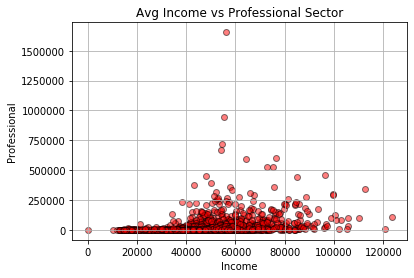

In [14]:
plt.scatter(census_state_results_2015["Income"],census_state_results_2015["Professional"], marker="o", facecolors="red", edgecolors="black",alpha=0.5)
plt.xlabel("Income")
plt.ylabel("Professional")
plt.title(f"Avg Income vs Professional Sector")
plt.savefig("png_folder//Avg Income vs Professional Sector.png")
plt.grid()
plt.show()

The r-squared is: 0.08797845176788946


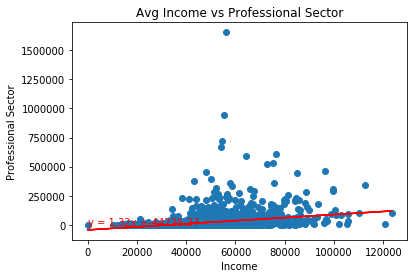

In [15]:
x_value = census_state_results_2015["Income"]
y_value = census_state_results_2015["Professional"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)

print(f"The r-squared is: {rvalue**2}")
r_line = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

regression_values = x_value * slope + intercept
plt.scatter(x_value,y_value)
plt.annotate(r_line,(5, 40),color="red")
plt.plot(x_value,regression_values, "r-")
plt.title("Avg Income vs Professional Sector")
plt.xlabel("Income")
plt.ylabel("Professional Sector")
plt.savefig("png_folder//Avg Income vs.Professional Sector Latitude Linear Regression.png")
plt.show()